In [1]:
%matplotlib notebook 
# Import modules
import math
import numpy as np
import matplotlib.pyplot
from pyne import serpent
from pyne import nucname

/home/andrei2/anaconda3/lib/python3.5/site-packages/pyne/serpent.py:11: QAWarning: pyne.serpent is not yet QA compliant.
  warn(__name__ + " is not yet QA compliant.", QAWarning)


In [9]:
res200 = serpent.parse_res('/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/npop_refinement/tap_bol_200_res.m')
res300 = serpent.parse_res('/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/npop_refinement/tap_bol_300_res.m')
res360 = serpent.parse_res('/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/npop_refinement/tap_bol_360_res.m')
res400 = serpent.parse_res('/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/npop_refinement/tap_bol_400_res.m')
res800 = serpent.parse_res('/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/npop_refinement/tap_bol_800_500_res.m')

cycles = [200, 300, 360, 400, 800]
keff = np.zeros(len(cycles))
keff_err = np.zeros(len(cycles))

keff[0] = res200['IMP_KEFF'][:,0]
keff[1] = res300['IMP_KEFF'][:,0]
keff[2] = res360['IMP_KEFF'][:,0]
keff[3] = res400['IMP_KEFF'][:,0]
keff[4] = res800['IMP_KEFF'][:,0]

keff_err[0] = res200['IMP_KEFF'][:,1]
keff_err[1] = res300['IMP_KEFF'][:,1]
keff_err[2] = res360['IMP_KEFF'][:,1]
keff_err[3] = res400['IMP_KEFF'][:,1]
keff_err[4] = res800['IMP_KEFF'][:,1]

print(keff)
print(keff_err)

[ 1.01895  1.01876  1.01911  1.01877  1.01924]
[ 0.00028  0.0002   0.00018  0.00018  0.00011]
[]


<IPython.core.display.Javascript object>


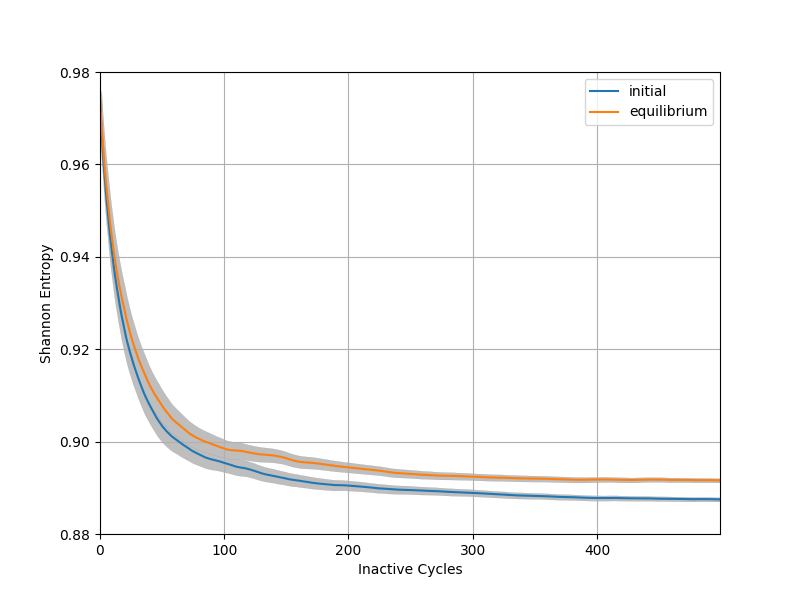

In [57]:
# read Shannon entropy from his file
import serpentTools
from serpentTools.settings import rc

his = serpentTools.read('/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/npop_refinement/tap_bol_800_500_his0.m')
H_src = his.arrays['entrSpt']

inactive_cycles = range(500)
H_inactive = H_src[:500,1]
H_inact_err = H_src[:500,2]

his20 = serpentTools.read('/home/andrei2/Desktop/git/meitner-task-2/saltproc_results/npop_refinement/feed_1979/tap_bol_800_500_his0.m')
H_src_20 = his20.arrays['entrSpt']

# Initialize figure
fig_1 = matplotlib.pyplot.figure(1, figsize=[8,6])
ax = fig_1.add_subplot(111)
ax.grid(True)
ax.plot(inactive_cycles, H_inactive, '-', label='initial', linewidth=1.5)
ax.plot(inactive_cycles, H_src_20[:500,1], '-', label='equilibrium', linewidth=1.5)

ax.fill_between(inactive_cycles, H_inactive-H_inact_err, H_inactive+H_inact_err, edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)
ax.fill_between(inactive_cycles, H_src_20[:500,1]-H_src[:500,2], H_src_20[:500,1]+H_src[:500,2], edgecolor='#808080', facecolor='#BEBEBE', linewidth=0.1)

ax.legend(loc=0)
ax.set_ylabel('Shannon Entropy')
ax.set_xlabel('Inactive Cycles')
#ax.set_title('Multiplication factor for online reprocessing case ' + str(EOS) +' days')
ax.set_xlim(0,max(inactive_cycles))
ax.set_ylim([0.88, 0.98])
fig_1.show()
#fig_1.savefig('/home/andrei2/Desktop/git/meitner-task-2/doc/2019-06-q4-report/figures/h_src.png',bbox_inches='tight', dpi=700)